# Немного статистики

In [28]:
import pandas as pd
import scipy.stats
import numpy as np

In [29]:
df = pd.DataFrame()
df['shoe_size'] = [36, 39, 39, 36, 39, 37, 40, 38, 41]

In [30]:
# сортировка
df['shoe_size'].sort_values()

,shoe_size
0,36
3,36
5,37
7,38
2,39
1,39
4,39
6,40
8,41


In [ ]:
# основная описательная статистика
df.describe()

#### Среднее арифметическое

In [31]:
df['shoe_size'].mean()  # среднее арифметическое = сумма/количество

np.float64(38.333333333333336)

#### Медиана

In [32]:
df['shoe_size'].median()  # медиана = то, что посередине отсортированного ряда
                          # если n нечётное - число посередине: x[(n+1)/2]
                          # если n чётное - число между центральными: (x[n/2] + x[(n+1)/2])/2

39.0

#### Мода

In [ ]:
df['shoe_size'].mode()  # мода - то, что чаще всего повторяется

#### .plot() - графики

<Axes: ylabel='Frequency'>

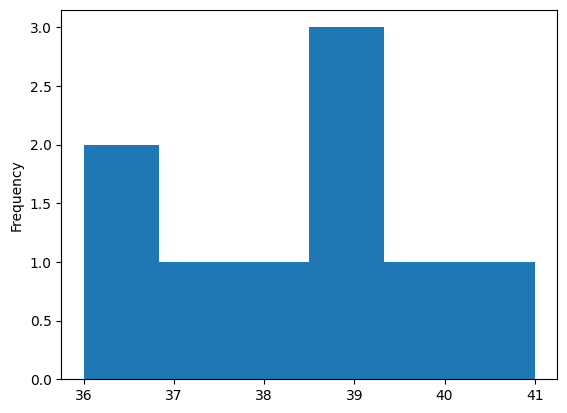

In [42]:
df['shoe_size'].plot(kind='hist', bins=6)

In [37]:
df['shoe_size'].value_counts()

,count
shoe_size,
39,3
36,2
37,1
40,1
38,1
41,1


<Axes: >

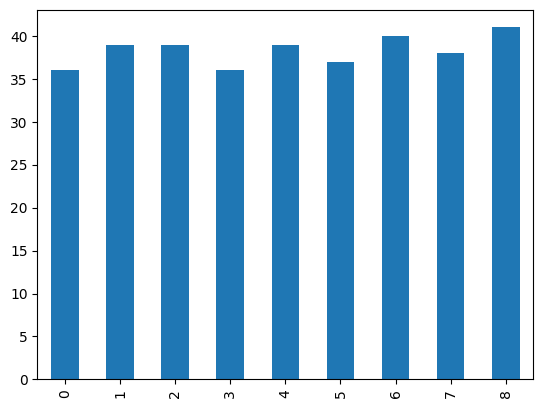

In [43]:
df['shoe_size'].plot(kind='bar')

<Axes: xlabel='shoe_size'>

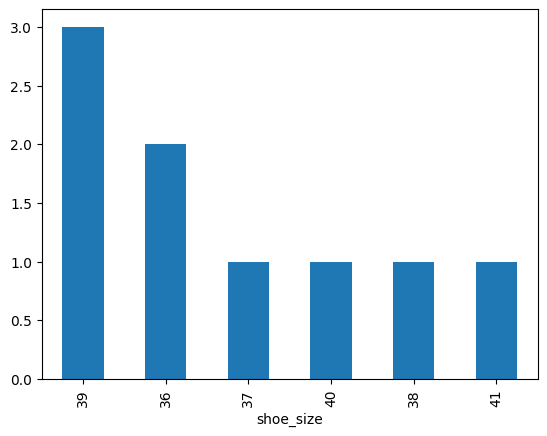

In [44]:
df['shoe_size'].value_counts().plot(kind='bar')

<Axes: >

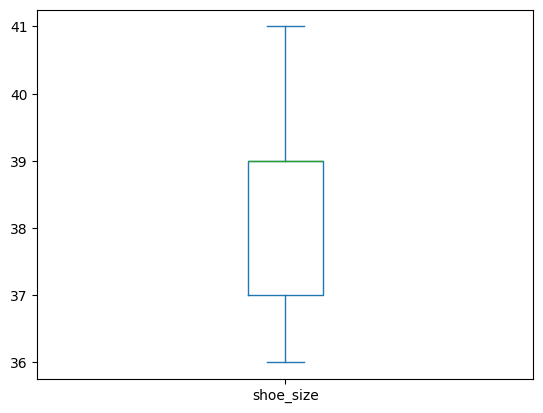

In [45]:
df['shoe_size'].plot(kind='box')

#### Квартили

In [46]:
df['shoe_size'].quantile(0.25)  # первый квартиль, Q1 = значение, меньше которого будет 25% наблюдений
                                # (n+1)*0.25 - индекс нужного нам значения
                                # (если не целое число, считем ср.арифм. между этим и следующим)

np.float64(37.0)

In [47]:
df['shoe_size'].quantile(0.75) # третий квартиль, Q3 = значение, меньше которого будет 75% наблюдений

np.float64(39.0)

In [48]:
df['shoe_size'].quantile(0.34)

np.float64(37.72)

In [49]:
# что такое Q2?
df['shoe_size'].quantile(0.5)

np.float64(39.0)

#### Среднеквадратичное отклонение

Насколько обычно значения отклоняются от среднего?

In [53]:
average = df['shoe_size'].mean()
average  # это среднее

np.float64(38.333333333333336)

In [54]:
df['shoe_size'] - average  # на столько отклоняются значения

,shoe_size
0,-2.333333
1,0.666667
2,0.666667
3,-2.333333
4,0.666667
5,-1.333333
6,1.666667
7,-0.333333
8,2.666667


In [58]:
(df['shoe_size'] - average)**2  # возведём в квадрат, чтобы значения были положительные

,shoe_size
0,5.444444
1,0.444444
2,0.444444
3,5.444444
4,0.444444
5,1.777778
6,2.777778
7,0.111111
8,7.111111


In [59]:
((df['shoe_size'] - average)**2).sum() / len(df['shoe_size'])  # нашли среднее отклонений в квадрате
                                                               # это дисперсия от лат. dispersio «рассеяние»

np.float64(2.6666666666666665)

In [60]:
(((df['shoe_size'] - average)**2).sum() / len(df['shoe_size'])) ** (1/2)  # взяли корень
                                                                          # это стандартное отклонение

np.float64(1.632993161855452)

In [63]:
df['shoe_size'].var(ddof=0)  # дисперсия

2.6666666666666665

In [64]:
df['shoe_size'].std(ddof=0)  # стандартное отклонение

1.632993161855452

σ = 2.211083193570267

σ - сигма (а её строчный вариант - Σ - обозначение для суммы)

Когда мы работаем с выборкой, а не генеральной совокупностью, мы используем поправку, которая делает дисперсию и стандартное отклонения чуть больше.

In [61]:
df['shoe_size'].var()   # дисперсия

3.0

In [62]:
df['shoe_size'].std()   # стандартное отклонение

1.7320508075688772

Про нормальное распредление известно, сколько процентов всех данных попадает в какой промежуток
![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/refs/heads/main/pic/std.png)

# Z-оценка

In [65]:
!wget https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/refs/heads/main/data/eng_test.csv

--2025-04-17 08:56:18--  https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/refs/heads/main/data/eng_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5235 (5.1K) [text/plain]
Saving to: ‘eng_test.csv.1’

eng_test.csv.1      100%[===================>]   5.11K  --.-KB/s    in 0s      

2025-04-17 08:56:19 (50.7 MB/s) - ‘eng_test.csv.1’ saved [5235/5235]



In [67]:
eng = pd.read_csv('eng_test.csv', sep=';')
eng # откройте датасет

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES
...,...,...,...,...
269,ID95,TOEFL,88.0,YES
270,ID96,TOEFL,90.0,YES
271,ID97,TOEFL,90.0,YES
272,ID98,TOEFL,54.0,NO


<Axes: ylabel='Frequency'>

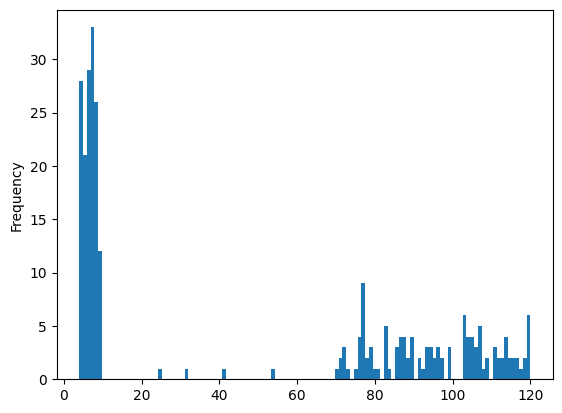

In [70]:
eng['Score'].plot(kind='hist', bins=120)

Получился странный график, потому что у двух экзаменов разные шкалы оценивания.

In [71]:
# какие значения в Exam?
eng['Exam'].unique()

array(['TOEFL', 'IELTS'], dtype=object)

In [74]:
# выведем статистику только про 'TOEFL'
toefl = eng[eng['Exam'] == 'TOEFL']
toefl.describe()

,Score
count,125.000000
mean,93.776000
std,17.903804
min,25.000000
25%,81.000000
50%,94.000000
75%,107.000000
max,120.000000


<Axes: >

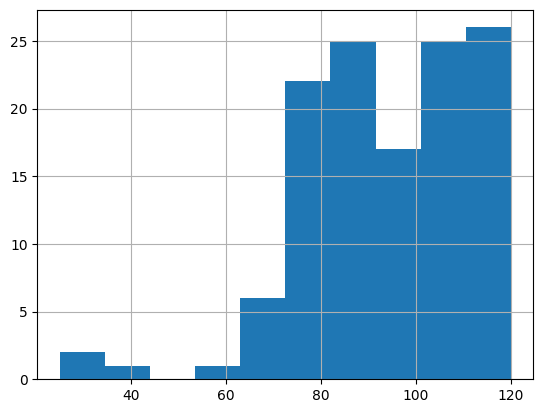

In [75]:
toefl['Score'].hist()

In [76]:
# а теперь про ielts
ielts = eng[eng['Exam'] == 'IELTS']
ielts.describe()

,Score
count,149.000000
mean,6.432886
std,1.571126
min,4.000000
25%,5.000000
50%,6.500000
75%,8.000000
max,9.000000


<Axes: >

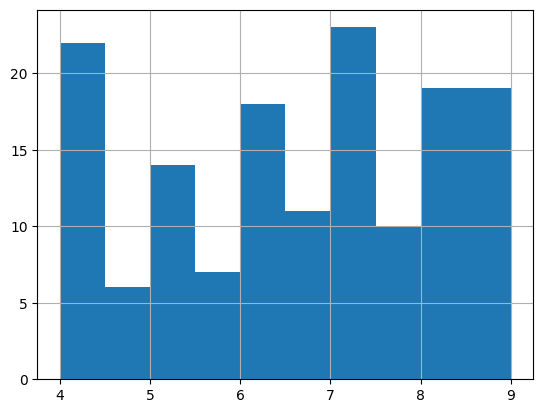

In [77]:
ielts['Score'].hist()

Получается, что у нас два распределения. От 0 до 10 и от 0 до 120. С разным средним и разным стандартным отклонением. Как делать выводы, кто молодец?

Что лучше: 7 из 10 или 84 из 120?

(и то, и другое - решение 70% экзамена, но получается, что первый решил лучше среднего и медианы, а второй хуже)

Как привести к единой шкале?

Идея: перевести наши значения в расстояние до среднего в сигмах (в стандартных отклонениях)

Воспоминание про стандартное отклонение:

![формула](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/std_formula.png)
![картинка](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/std.png)

Формула z-оценки: `𝑧 = (𝑋 – μ)/σ`

μ - математическое ожидание, среднее

In [78]:
# вот студент с оценкой за экзамен
X = toefl['Score'][0]
X
# посчитаем z-оценку для него

np.float64(77.0)

In [79]:
# вот среднее за экзамен
M = toefl['Score'].mean()
M

np.float64(93.776)

In [80]:
# вот стандартное отклонение
sigma = toefl['Score'].std(ddof=0)
sigma

17.83204486311091

In [ ]:
# вот z-оценка
z_score = (X - M) / sigma
z_score

В обратную сторону тоже легко: `𝑋 = μ + 𝑧*σ`

In [83]:
# вот такая z-оценка
z_new = 1.4706109

# какая оценка за toefl?
X_new = M + z_new * sigma
print(X_new)

119.99999954497991


In [84]:
X_new = 6.432886 + z_new * 1.571126
print(X_new)

8.7434010208734


Если перевести все значения в z-оценки, получится `z-распределение` (или стандартизированное).

Среднее в нем будет равно нулю, а среднеквадратичное отклонение — единице.

`scipy.stats.zscore()` - для z-оценки

In [85]:
scipy.stats.zscore(toefl['Score'])

,Score
0,-0.940778
1,0.629429
2,0.741586
3,-1.221172
4,1.470611
...,...
269,-0.323911
270,-0.211754
271,-0.211754
272,-2.230591


Посмотрим на toefl и ielts

In [86]:
toefl['z-score'] = scipy.stats.zscore(toefl.loc[:,'Score'])

<ipython-input-86-67afc134f386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toefl['z-score'] = scipy.stats.zscore(toefl.loc[:,'Score'])


In [87]:
ielts['z-score'] = scipy.stats.zscore(ielts.loc[:,'Score'])

<ipython-input-87-206726ba58e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ielts['z-score'] = scipy.stats.zscore(ielts.loc[:,'Score'])


In [88]:
ielts

,Id,Exam,Score,Advanced,z-score
30,ID126,IELTS,9.0,YES,1.639443
31,ID127,IELTS,5.0,NO,-0.915088
32,ID128,IELTS,7.5,YES,0.681494
33,ID129,IELTS,5.0,NO,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


In [89]:
eng = pd.concat([toefl, ielts])

In [90]:
eng

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


Теперь все результаты можно изобразить на одном графике

<Axes: >

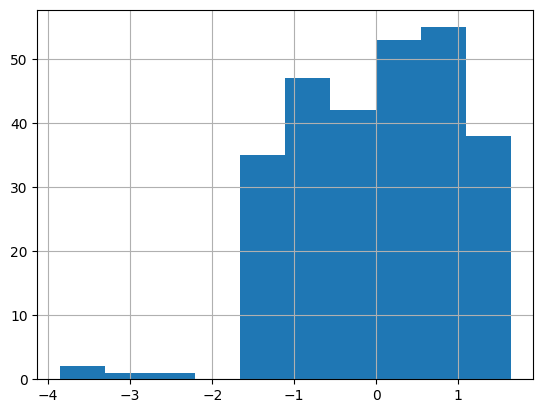

In [91]:
eng['z-score'].hist()

In [94]:
# Кто в 0.1 сдавших хуже всего?
eng[eng['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [95]:
# Лучше сдала Advanced группа? (посмотреть среднее по группам)
eng.groupby('Advanced')['z-score'].mean()

,z-score
Advanced,
NO,-0.397672
YES,0.440499
